## Данный файл предназначен для того, чтобы разобраться как строить графики по данным из файлов .csv

`Ниже будут представлены полезные ссылки, которые мне помогали с составлением этого файла.`

---> https://pythonru.com/primery/pandas-na-primerah 
-Работа с pandas

---> https://ru.hexlet.io/courses/python-pandas/lessons/index-rules/theory_unit 
-Работа с индексами в pandas

--> https://sky.pro/wiki/pythonustranyaem-indeks-stolbets-v-pandas-csv-bez-key-error/ 
-Устраняем индекс-столбец в pandas CSV: без KeyError

---> https://www.codecamp.ru/blog/drop-index-pandas/ 
-Как удалить столбец индекса в Pandas (с примерами)

---> https://www.youtube.com/watch?v=LLFOZ2vN7ss&t=902s 
-Как оформить текст в Jupyter Notebook с помощью Markdown

### 4.3 Настройка усилителя мощности

In [203]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

In [204]:
# Считаем данные из CSV-файла 
# ctrl + / - закомментировать кусок кода
data = pd.read_csv('CH1_CH2_4-3.csv', index_col= False) # Чтение файла в переменную data

C:\Users\User\AppData\Local\Temp\ipykernel_9128\1981684878.py:3: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  data = pd.read_csv('CH1_CH2_4-3.csv', index_col= False) # Чтение файла в переменную data


```python
 index_col= False  # сбрасывает индекс при импорте!
``` 
#### `Удалять столбец индекса нужно для корректного соответствия данных !`

### Посмотрим как отображается наша таблица. Выведем её верхнюю часть

In [205]:
data.head()

,Time [s],CH1 [V],CH2 [V];;;;;;
0,2.000000e-09,-0.016,0.128
1,2.000000e-09,0.006,0.084
2,2.000000e-09,0.028,0.036
3,2.000000e-09,0.046,-0.004
4,2.000000e-09,0.064,-0.048


В столбце CH2 [V];;;;;; присутствуют лишние символы (;;;;;;), которые могут мешать правильному извлечению данных._

`Код ниже демонстрирует как можно убрать лишнии символы из столбцов и строк таблицы 
.csv`

In [206]:
# Убираем лишние символы из названий столбцов
data.columns = data.columns.str.replace(r';+', '', regex=True)
# Удаляем лишние символы в строках данных
data = data.replace(r';+', '', regex=True)
# Теперь названия столбцов корректны: 'Time [s]', 'CH1 [V]', 'CH2 [V]'

### Проверим как теперь отображается .csv таблица

In [207]:
data.head()

,Time [s],CH1 [V],CH2 [V]
0,2.000000e-09,-0.016,0.128
1,2.000000e-09,0.006,0.084
2,2.000000e-09,0.028,0.036
3,2.000000e-09,0.046,-0.004
4,2.000000e-09,0.064,-0.048


In [208]:
print(data['CH1 [V]'].head(10))  # Проверим первые 10 значений CH2 после очистки
print(data['CH2 [V]'].head(10))  # Проверим первые 10 значений CH2 после очистки

0   -0.016
1    0.006
2    0.028
3    0.046
4    0.064
5    0.082
6    0.098
7    0.112
8    0.124
9    0.134
Name: CH1 [V], dtype: float64
0    0.128
1    0.084
2    0.036
3   -0.004
4   -0.048
5   -0.092
6   -0.128
7   -0.160
8   -0.184
9   -0.212
Name: CH2 [V], dtype: float64


#### Полученные данные соответствуют своим столбцам, значит можно переходить к построению графиков

### Построение данных

In [263]:
discrete_time = 2.000000e-09 # значение дискрета по времени, взятое из таблицы csv

# Создание вектора времени
time = np.arange(0, 300 * discrete_time, discrete_time)

# Извлечение данных из столбцов CH1 и CH2

ch1 = 100 * data.iloc[0:300]['CH1 [V]'] # вырезаем строки с нулевой по пятисотую из стобца
                                # CH1 [V]
ch2 = data.iloc[0:300]['CH2 [V]']


#display(ch1.iloc[1000]) # iloc() — метод выбора строк согласно их числовой позиции
                        #loc() — метод выбора данных на основе меток строк


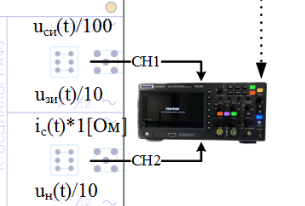 

Так как в 1 канале осциллографа показывается  $Uси / 100$, следовательно все значения нужно умножить на 100, чтобы получить правильные данные в вольтах

$Iс$ снимается с 2 канала сразу в амперах сразу в верных значениях


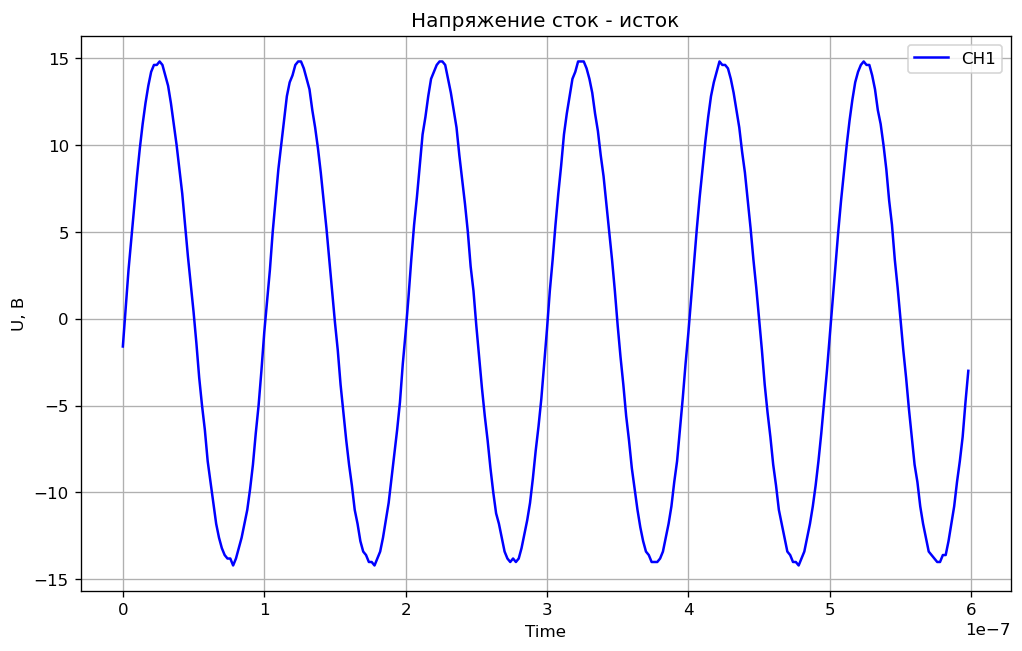

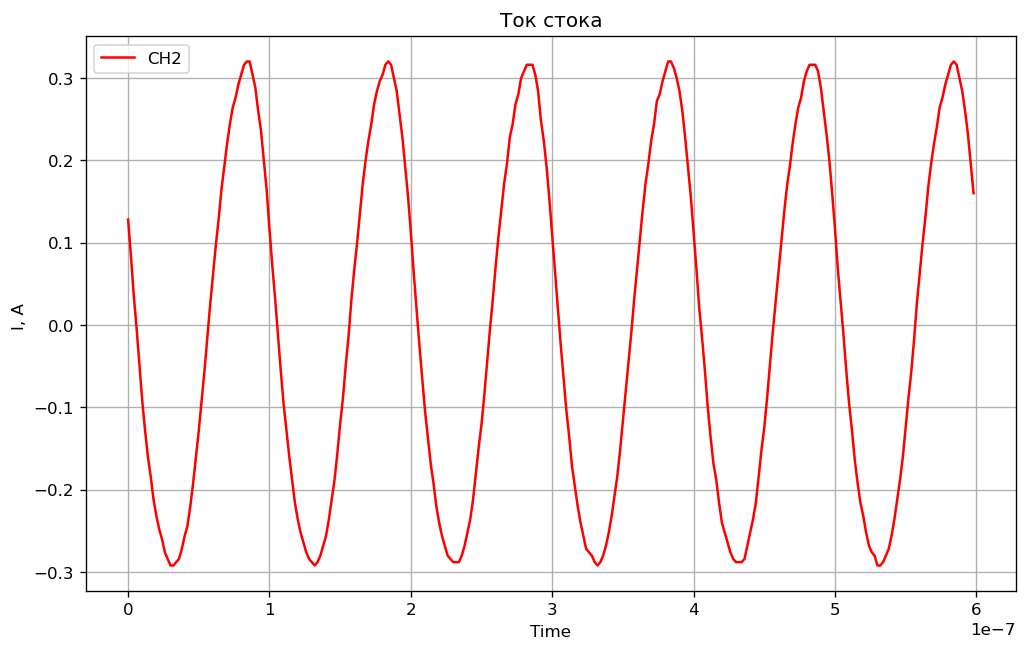

In [262]:
# Построение графиков
plt.figure(figsize=(10, 6), dpi=120)
# Осциллограмма для CH1
plt.plot(time, ch1, label='CH1', color='blue')
# Настройка графика
plt.title('Напряжение сток - исток')
plt.xlabel('Time')
plt.ylabel('U, В')
plt.legend()
plt.grid(True)
# Отображение графика
plt.show()

plt.figure(figsize=(10, 6), dpi=120)
# Осциллограмма для CH2
plt.plot(time, ch2, label='CH2', color='red')
# Настройка графика
plt.title('Ток стока')
plt.xlabel('Time')
plt.ylabel('I, А ')
plt.legend()
plt.grid(True)
# Отображение графика
plt.show()


### 4.4 Нагрузочные характеристики

### Недонапряжённый режим

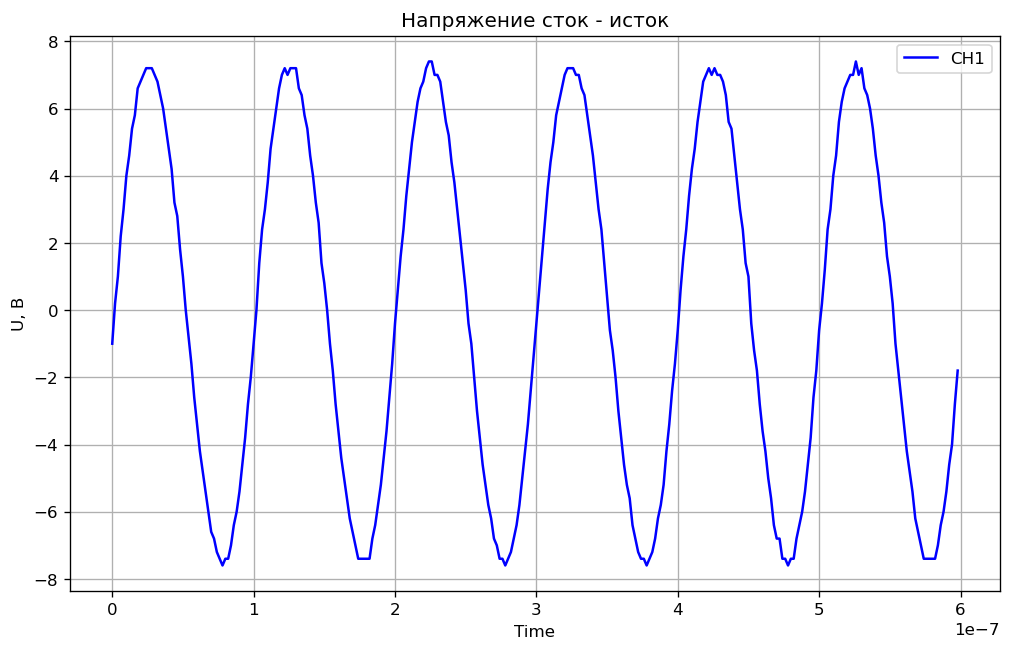

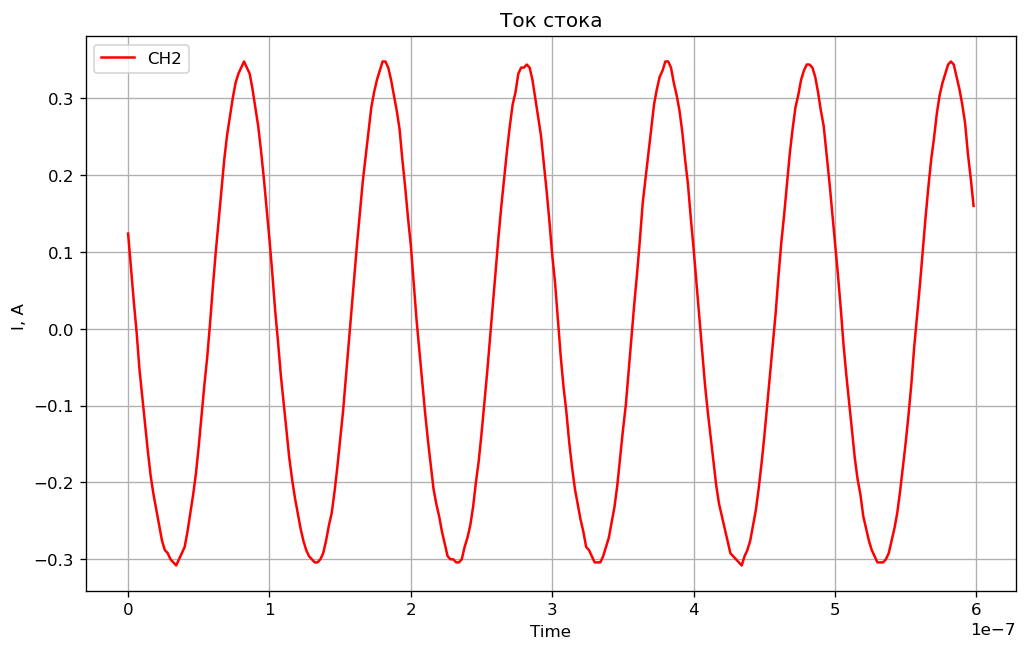

In [265]:
data1 = pd.read_csv('CH1_CH2_4-4-1.csv', index_col= False)
data2 = pd.read_csv('CH1_CH2_4-4-2.csv', index_col= False)


NR_ch1 = 100 * data1.iloc[0:300]['CH1 [V]'] # вырезаем строки с нулевой по пятисотую из стобца
                                # CH1 [V]
NR_ch2 = data1.iloc[0:300]['CH2 [V]']

# Построение графиков
plt.figure(figsize=(10, 6), dpi=120)
# Осциллограмма для CH1
plt.plot(time, NR_ch1, label='CH1', color='blue')
# Настройка графика
plt.title('Напряжение сток - исток')
plt.xlabel('Time')
plt.ylabel('U, В')
plt.legend()
plt.grid(True)
# Отображение графика
plt.show()

plt.figure(figsize=(10, 6), dpi=120)
# Осциллограмма для CH2
plt.plot(time, NR_ch2, label='CH2', color='red')
# Настройка графика
plt.title('Ток стока')
plt.xlabel('Time')
plt.ylabel('I, А ')
plt.legend()
plt.grid(True)
# Отображение графика
plt.show()


### Перенапряжённый режим

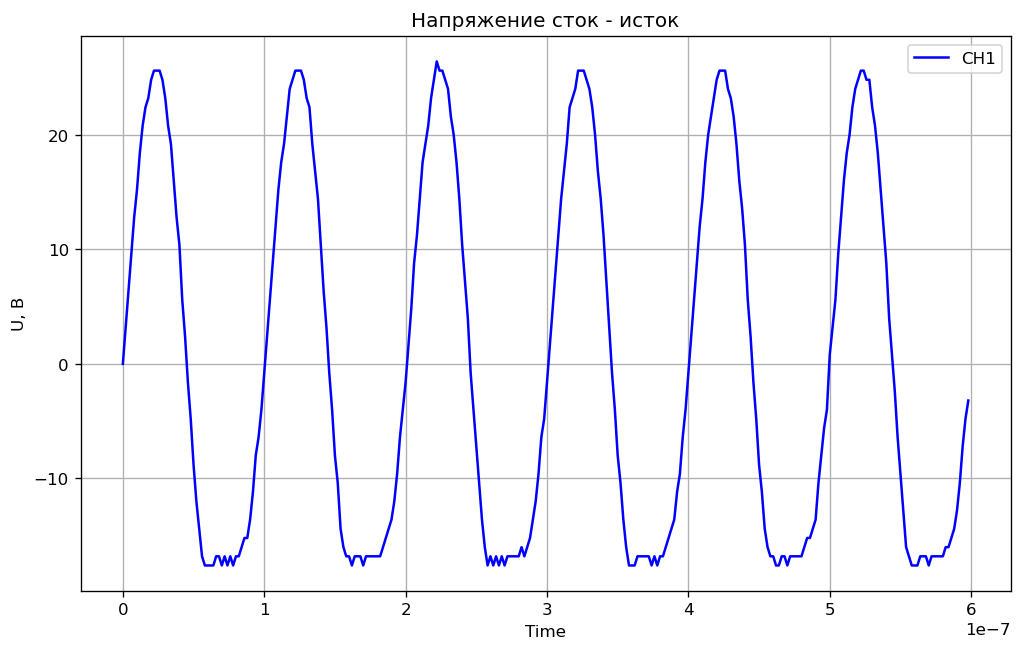

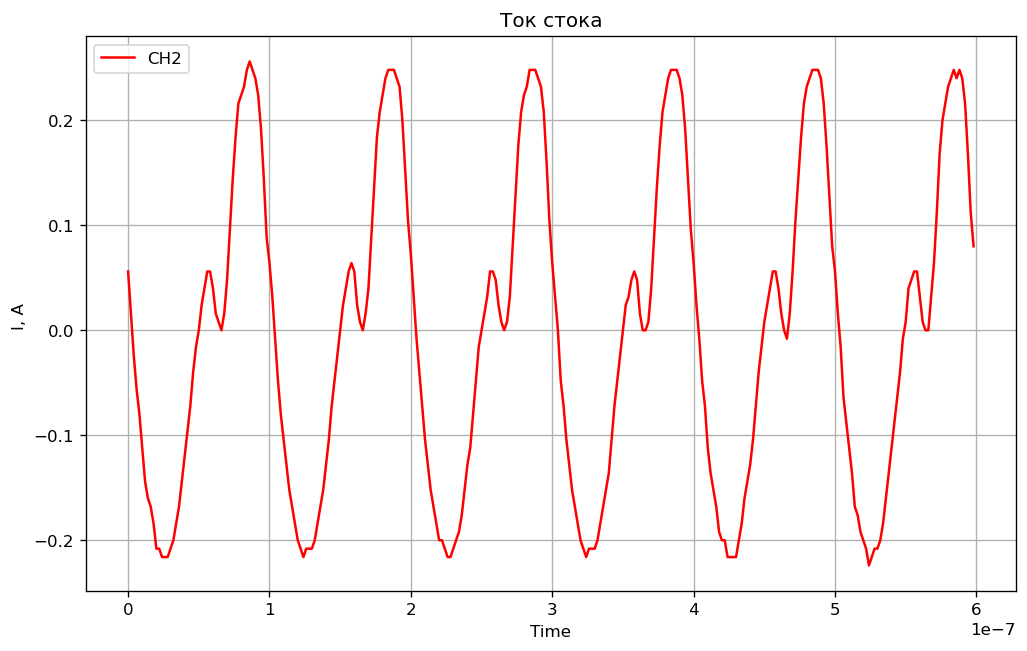

In [266]:
PR_ch1 = 100 * data2.iloc[0:300]['CH1 [V]'] # вырезаем строки с нулевой по пятисотую из стобца
                                # CH1 [V]
PR_ch2 = data2.iloc[0:300]['CH2 [V]']

# Построение графиков
plt.figure(figsize=(10, 6), dpi=120)
# Осциллограмма для CH1
plt.plot(time, PR_ch1, label='CH1', color='blue')
# Настройка графика
plt.title('Напряжение сток - исток')
plt.xlabel('Time')
plt.ylabel('U, В')
plt.legend()
plt.grid(True)
# Отображение графика
plt.show()

plt.figure(figsize=(10, 6), dpi=120)
# Осциллограмма для CH2
plt.plot(time, PR_ch2, label='CH2', color='red')
# Настройка графика
plt.title('Ток стока')
plt.xlabel('Time')
plt.ylabel('I, А ')
plt.legend()
plt.grid(True)
# Отображение графика
plt.show()